# Jarvis march algorithm

Use the cell below for all python code needed to realise the Jarvis march algorithm (including any auxiliary data structures and functions you might need). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [2]:
def starting_point(inputSet):
    number = 32767

    for point in inputSet:
        if point[0] < number:
            number = point[0]
            st_point = point

    return st_point


def cross_product(a, b, c):
    v1 = (a[0] - b[0], a[1] - b[1])
    v2 = (a[0] - c[0], a[1] - c[1])

    return v2[1] * v1[0] - v1[1] * v2[0]


def distance(a, b, c):
    v1 = (a[0] - b[0], a[1] - b[1])
    v2 = (a[0] - c[0], a[1] - c[1])
    d_ab = (v1[1] * v1[1] + v1[0] * v1[0])
    d_ac = (v2[1] * v2[1] + v2[0] * v2[0])

    return d_ab - d_ac

def jarvis_march(inputSet):
    result = []
    collinear = []
    result.append(starting_point(inputSet))
    current_point = starting_point(inputSet)
    while True:
        next_point = inputSet[0]
        for i in range(len(inputSet)):
            if i == 0:
                continue
            if inputSet[i] == current_point:
                continue
            value = cross_product(current_point, next_point, inputSet[i])
            if value > 0:
                next_point = inputSet[i]
                collinear = []
            elif value == 0:
                if distance(current_point, next_point, inputSet[i]) < 0:
                    collinear.append(next_point)
                    next_point = inputSet[i]
                else:
                    collinear.append(inputSet[i])

        for point in collinear:
            result.append(point)

        if next_point == starting_point(inputSet):
            break

        result.append(next_point)
        current_point = next_point
    print("jarvis march completed")
    return result

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [3]:
import random
import math

#code for random data generation
def random_input(n):
    random_set = set()
    while len(random_set) < n:
        x = random.randint(0, 32767)
        y = random.randint(0, 32767)
        random_set.add((x, y))
    return list(random_set)
#code for worst case data generation
def worst_input(n):
    random_set = set()
    c_x = 16383
    c_y = 16383
    r = 16000

    while len(random_set) < n:
        alpha = 2 * math.pi * random.random()
        x = (r * math.cos(alpha) + c_x)
        y = (r * math.sin(alpha) + c_y)
        random_set.add((x, y))
    return list(random_set)

Use the cell below for all python code needed to test the `jarvismarch()` function on the data generated above.

In [4]:
import timeit

#test code
def random_average_time(n):
    times = []
    for i in range(0, 5):
        input_set = random_input(n)
        start_time = timeit.default_timer()
        jarvis_march(input_set)
        end_time = timeit.default_timer() - start_time
        times.append(end_time)
    average = sum(times) / len(times)
    print("random average time for ", n, "points: ", average)
    return average

def worst_average_time(n):
    times = []
    for i in range(0, 5):
        input_set = worst_input (n)
        start_time = timeit.default_timer()
        jarvis_march(input_set)
        end_time = timeit.default_timer() - start_time
        times.append(end_time)
    average = sum(times) / len(times)
    print("worst average time for ", n, "points: ", average)
    return average



*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

jarvis march completed


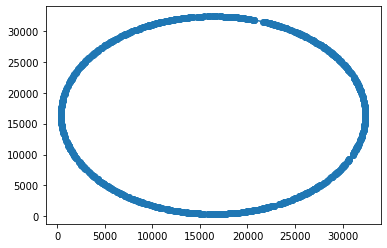

In [5]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

inputSet = worst_input(1000)
outputSet = jarvis_march(inputSet)

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 